# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline

## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 4
bf_env = bf(n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()


x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=1, annealing=0.8, tau = 0.95, replay_buffer_size=1e5, batch_size=128)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=300, episode=16, iteration=40)

Epoch 0 Episode 15: loss is 0.0482
Epoch 1 Episode 15: loss is 0.0168
Epoch 2 Episode 15: loss is 0.0163
Epoch 3 Episode 15: loss is 0.0191
Epoch 4 Episode 15: loss is 0.0226
Epoch 5 Episode 15: loss is 0.0211
Epoch 6 Episode 15: loss is 0.0326
Epoch 7 Episode 15: loss is 0.0466
Epoch 8 Episode 15: loss is 0.0194
Epoch 9 Episode 15: loss is 0.0204
Epoch 10 Episode 15: loss is 0.0212
Epoch 11 Episode 15: loss is 0.0468
Epoch 12 Episode 15: loss is 0.0493
Epoch 13 Episode 15: loss is 0.0407
Epoch 14 Episode 15: loss is 0.0545
Epoch 15 Episode 15: loss is 0.0379
Epoch 16 Episode 15: loss is 0.0576
Epoch 17 Episode 15: loss is 0.0414
Epoch 18 Episode 15: loss is 0.029
Epoch 19 Episode 15: loss is 0.023
Epoch 20 Episode 15: loss is 0.0157
Epoch 21 Episode 15: loss is 0.0694
Epoch 22 Episode 15: loss is 0.0407
Epoch 23 Episode 15: loss is 0.042
Epoch 24 Episode 15: loss is 0.0266
Epoch 25 Episode 15: loss is 0.104
Epoch 26 Episode 15: loss is 0.055
Epoch 27 Episode 15: loss is 0.0383
Epoch 2

Epoch 230 Episode 15: loss is 0.495
Epoch 231 Episode 15: loss is 0.639
Epoch 232 Episode 15: loss is 0.501
Epoch 233 Episode 15: loss is 0.573
Epoch 234 Episode 15: loss is 0.288
Epoch 235 Episode 15: loss is 0.864
Epoch 236 Episode 15: loss is 1.16
Epoch 237 Episode 15: loss is 0.509
Epoch 238 Episode 15: loss is 0.44
Epoch 239 Episode 15: loss is 0.586
Epoch 240 Episode 15: loss is 0.734
Epoch 241 Episode 15: loss is 0.664
Epoch 242 Episode 15: loss is 0.519
Epoch 243 Episode 15: loss is 0.595
Epoch 244 Episode 15: loss is 0.968
Epoch 245 Episode 15: loss is 0.675
Epoch 246 Episode 15: loss is 0.603
Epoch 247 Episode 15: loss is 0.979
Epoch 248 Episode 15: loss is 0.907
Epoch 249 Episode 15: loss is 0.835
Epoch 250 Episode 15: loss is 0.762
Epoch 251 Episode 15: loss is 0.765
Epoch 252 Episode 15: loss is 0.997
Epoch 253 Episode 15: loss is 0.387
Epoch 254 Episode 15: loss is 0.696
Epoch 255 Episode 15: loss is 0.701
Epoch 256 Episode 15: loss is 0.779
Epoch 257 Episode 15: loss is 

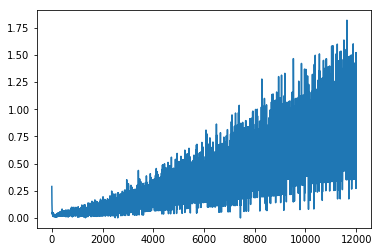

In [5]:
plt.figure()
plt.plot(losses)
plt.show()

## Test DQN

In [11]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    success = 0
    for i in range(100):
        
        bf_env.reset()

        for i in range(n):
            X = np.concatenate((bf_env.state.reshape((1,-1)),bf_env.goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            bf_env.update_state(action)
            if (bf_env.reward(bf_env.state)==0):
                print('Success! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Success! state:[0 0 1 1]	 Goal state:[0 0 1 1]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Success! state:[0 0 0 0]	 Goal state:[0 0 0 0]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Fail! state:[0 0 0 1]	 Goal state:[0 1 1 1]
Fail! state:[1 0 0 1]	 Goal state:[0 0 0 1]
Fail! state:[1 1 0 1]	 Goal state:[1 1 0 0]
Fail! state:[0 0 0 1]	 Goal state:[0 1 1 1]
Success! state:[1 0 1 0]	 Goal state:[1 0 1 0]
Fail! state:[1 1 1 1]	 Goal state:[0 1 0 1]
Fail! state:[1 1 0 0]	 Goal state:[0 0 0 1]
Fail! state:[1 0 0 1]	 Goal state:[0 1 1 0]
Fail! state:[1 1 0 1]	 Goal state:[0 1 1 0]
Success! state:[0 0 1 1]	 Goal state:[0 0 1 1]
Fail! state:[0 1 1 1]	 Goal state:[0 0 0 0]
Fail! state:[0 0 0 1]	 Goal state:[1 0 0 0]
Success! state:[0 0 0 1]	 Goal state:[0 0 0 1]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Fail! state:[0 0 0 1]	 Goal state:[0 1 1 1]
Success! state:[0 1 0 0]	 Goal stat

In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a.shape

(1, 6)

In [9]:
s=np.argmax(a)